Primer proyecto ETL para Ironhack sobre un csv de exoplanetas de kaggle.


In [75]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import re
pd.options.display.max_columns = None

In [76]:
from collections import Counter
from fuzzywuzzy import process, fuzz
import pickle

In [77]:
#!pip install missingno
import missingno as msno

In [100]:
df = pd.read_csv("../csv/definitivo.csv")
df.head()

,Unnamed: 0,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date_x,planet type,planet radius,orbital period,solar system name,planet discovery method,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],indice masa,tipo tamaño,description,discovery date_y,kepid,koi_impact,koi_prad
0,0,0,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,120 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.425,20.3,mas grande,Kepler-1000 b is a Neptune-like exoplanet that...,2016,10063802,0.580,4.54
1,1,1,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,14.3 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.281,10.1,mas grande,Kepler-1001 b is a Neptune-like exoplanet that...,2016,11074178,0.924,3.05
2,2,2,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,9.2 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.578,3.11,mas grande,Kepler-1001 b is a Neptune-like exoplanet that...,2016,11074178,0.971,2.17
3,3,3,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,4.3 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.710,3.57,mas grande,Kepler-1002 b is a super Earth exoplanet that ...,2016,7449136,0.641,1.75
4,4,4,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,3.6 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.780,3.82,mas grande,Kepler-1003 b is a super Earth exoplanet that ...,2016,8689793,0.331,1.29


In [214]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
mask

C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\2235876757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\2235876757.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\1398010726.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


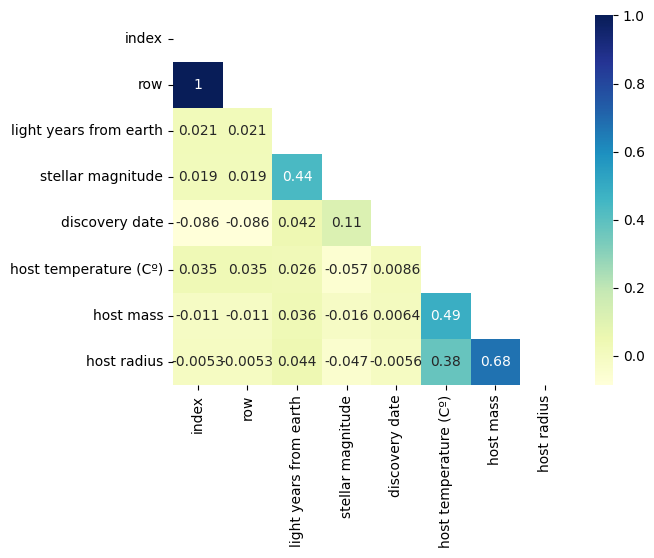

In [215]:
sns.heatmap(data.corr(),
            cmap = "YlGnBu", 
            mask = mask, 
           annot = True); 

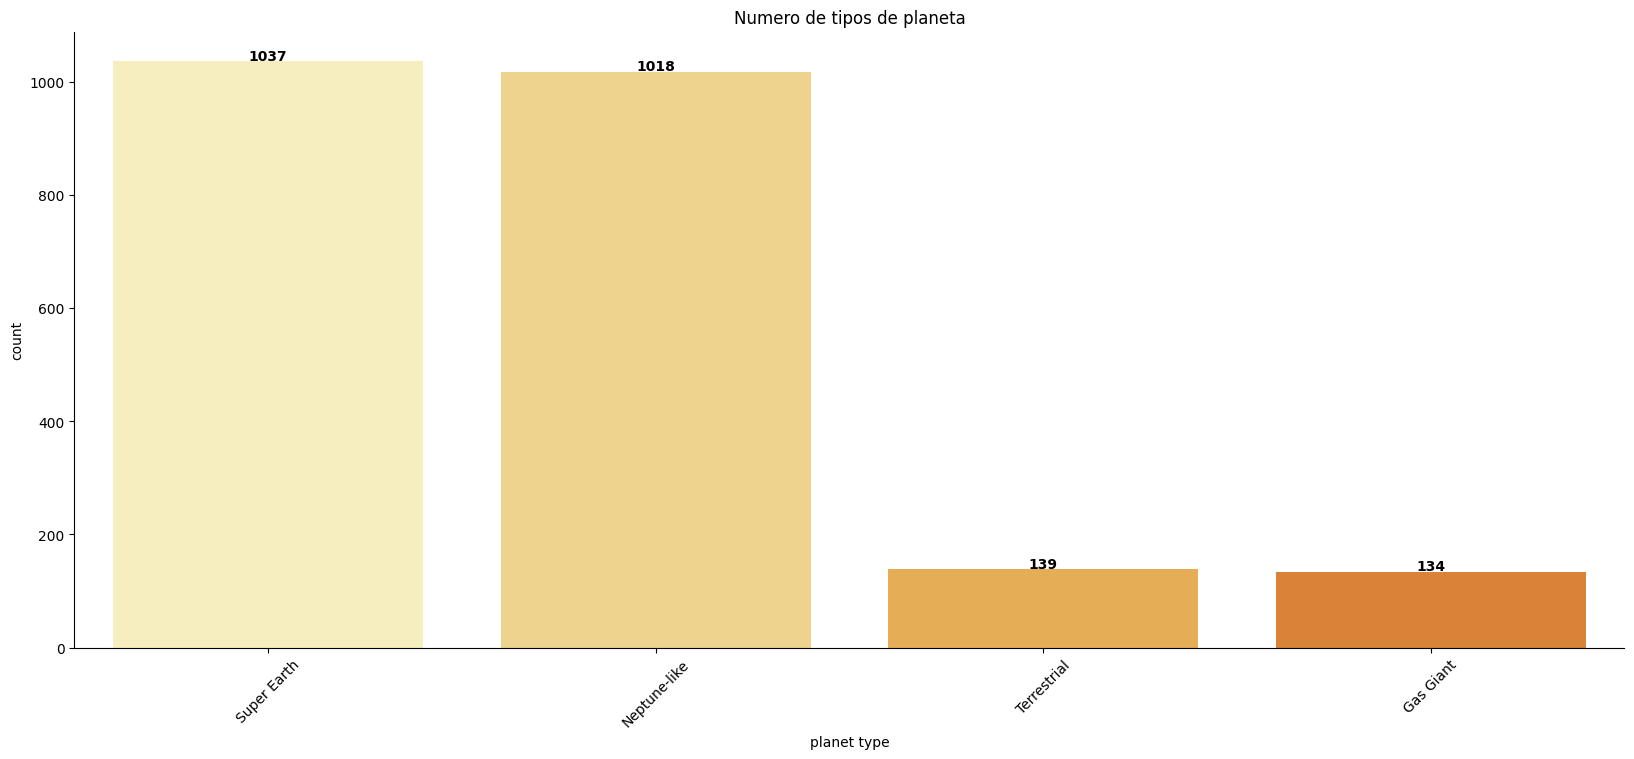

In [102]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "planet type",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["planet type"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("Numero de tipos de planeta")

ejex = df["planet type"].value_counts().index.tolist()
ejey = df["planet type"].value_counts().values.tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

#### we can notice that "super Earth" type is the most common really close to "Neptune-like"
#### is a good new becouse is what we are lookingo for.

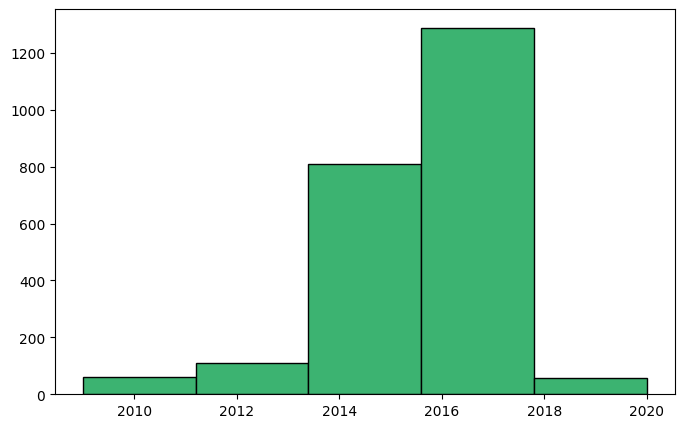

In [104]:
plt.figure(figsize = (8,5))
plt.hist(df["discovery date_x"], edgecolor = "black",
                              facecolor = "mediumseagreen",
                            bins = 5)
plt.show();

#### Aqui sabemos que en 2013 termino la primera fase de la mision, con todos los planetas como vemos a continuación, con una temperatura muy elevada incompatible con la vida.

In [111]:
df_2013= df[df["discovery date_x"] <= 2013]


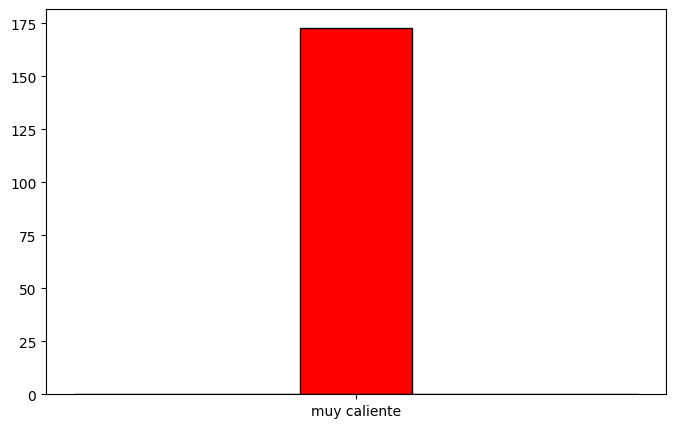

In [114]:
plt.figure(figsize = (8,5))
plt.hist(df_2013["Tª type"], edgecolor = "black",
                              facecolor = "red",
                            bins = 5)
plt.show();

#### Aqui vemos los posteriores, y todos con una Tª incompatible a la vida tambien.

In [113]:
df_2020 = df[df["discovery date_x"]> 2013]

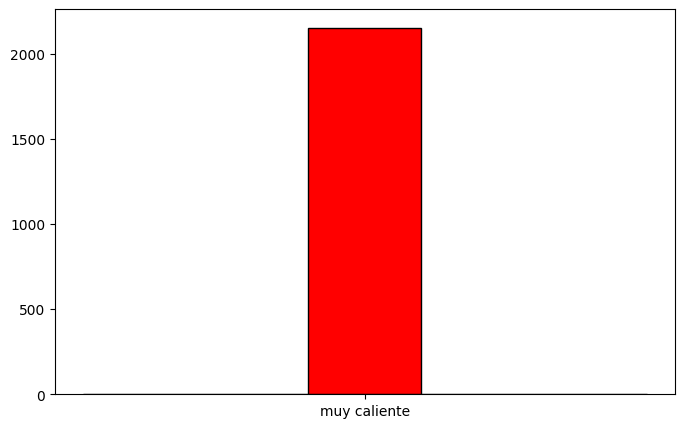

In [115]:
plt.figure(figsize = (8,5))
plt.hist(df_2020["Tª type"], edgecolor = "black",
                              facecolor = "red",
                            bins = 5)
plt.show();

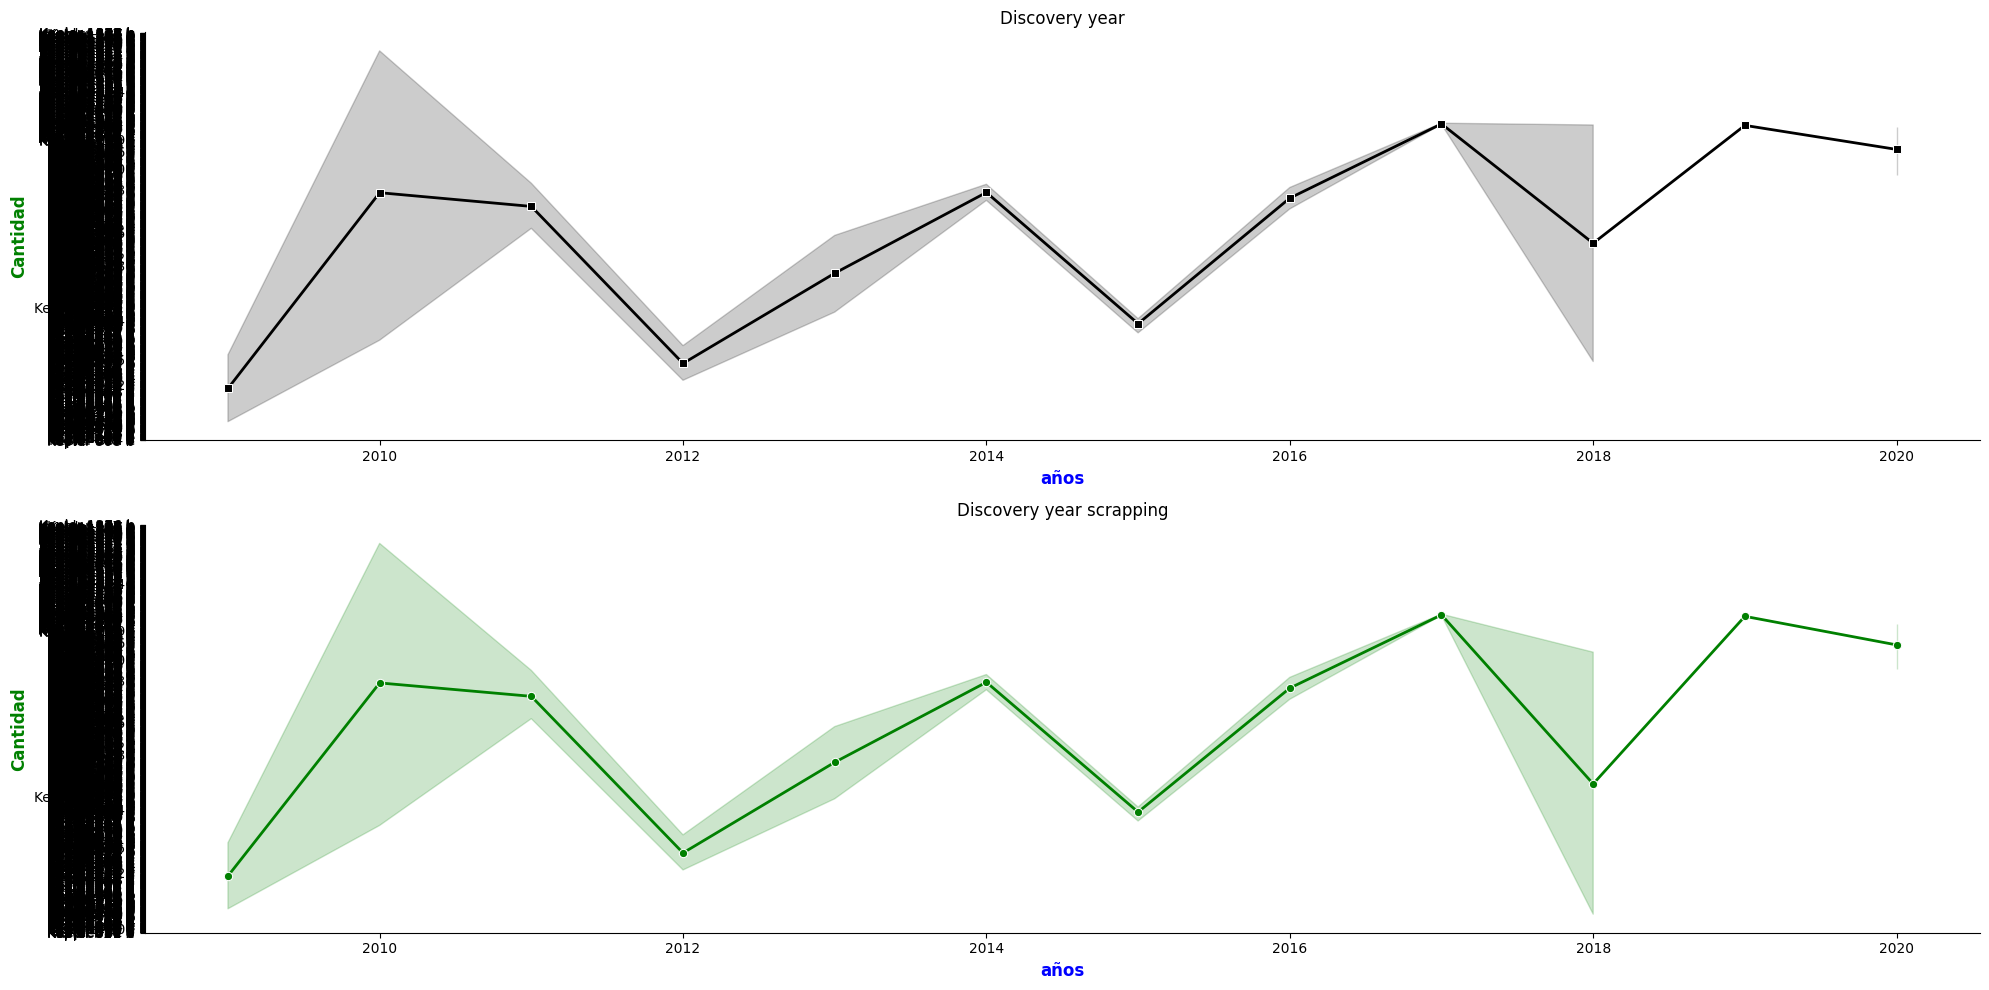

In [138]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))

sns.lineplot(data = df, 
             x = "discovery date_x", 
             y = "name", 
             marker = "s", 
             ax = axes[0], 
             linewidth = 2, 
             color = "black")

sns.lineplot(data = df, 
             x = "discovery date_y", 
             y = "name",
             marker = "o", 
             ax = axes[1], 
             linewidth = 2, 
             color = "green" )

axes[0].set_title("Discovery year")
axes[1].set_title("Discovery year scrapping")


# para quitar los ejes de arriba y de la derecha         
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)        

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


# para cambiar el nombre el eje x
axes[0].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)
axes[1].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)

# para cambiar el nombre el eje y
axes[0].set_ylabel('Cantidad', color = "green", fontweight = "bold", fontsize = 12)
axes[1].set_ylabel('Cantidad', color = "green", fontweight = "bold", fontsize = 12)

fig.tight_layout();

In [139]:
df.head()

,Unnamed: 0,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date_x,planet type,planet radius,orbital period,solar system name,planet discovery method,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],indice masa,tipo tamaño,description,discovery date_y,kepid,koi_impact,koi_prad
0,0,0,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,120 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.425,20.3,mas grande,Kepler-1000 b is a Neptune-like exoplanet that...,2016,10063802,0.580,4.54
1,1,1,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,14.3 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.281,10.1,mas grande,Kepler-1001 b is a Neptune-like exoplanet that...,2016,11074178,0.924,3.05
2,2,2,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,9.2 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.578,3.11,mas grande,Kepler-1001 b is a Neptune-like exoplanet that...,2016,11074178,0.971,2.17
3,3,3,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,4.3 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.710,3.57,mas grande,Kepler-1002 b is a super Earth exoplanet that ...,2016,7449136,0.641,1.75
4,4,4,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,3.6 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.780,3.82,mas grande,Kepler-1003 b is a super Earth exoplanet that ...,2016,8689793,0.331,1.29


In [142]:
tierra = {"index" : 0,"name": "Tierra", "indice masa": 1 ,"planet type" : "Super Earth", "planet radius [0]" : 1 , "orbital period" : 365, "host temperature (Cº)": 15, "host mass": 1, "host radius" :1, }